# Brand Choice and Promotion Modeling

## Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="darkgrid", rc=custom_params,palette='Set1')
from sklearn.linear_model import LogisticRegression 
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df_purchase = pd.read_csv('purchase_segmented.csv',index_col=0)

In [3]:
df_purchase.head()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment Names
ID,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,...,0,0,0,47,1,110866,1,0,2,fewer opportunities
200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,47,1,110866,1,0,2,fewer opportunities
200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,47,1,110866,1,0,2,fewer opportunities
200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,...,0,0,0,47,1,110866,1,0,2,fewer opportunities
200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,...,0,0,0,47,1,110866,1,0,2,fewer opportunities


## Data Preparation

In [4]:
df_purchase_predictors = df_purchase.copy()

In [5]:
segment_dummies = pd.get_dummies(df_purchase_predictors['Segment'], prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

In [6]:
price_range = np.arange(0.5, 3.0, 0.01)
df_price_range = pd.DataFrame(price_range,columns=['Price_range'])

## Purchase Probability with Promotion Features

In [7]:
y = df_purchase_predictors['Incidence']

In [8]:
X = pd.DataFrame()
X['Mean_Price'] = df_purchase_predictors[['Price_1','Price_2','Price_3','Price_4','Price_5']].mean(axis=1)

In [9]:
X['Mean_Promotion'] = df_purchase_predictors[['Promotion_1','Promotion_2',
                                             'Promotion_3','Promotion_4','Promotion_5']].mean(axis=1)

In [10]:
X.head()

,Mean_Price,Mean_Promotion
ID,,
200000001,2.044,0.2
200000001,2.028,0.0
200000001,2.028,0.0
200000001,2.028,0.0
200000001,2.030,0.0


## Model

In [11]:
model_incidence_promotion = LogisticRegression(solver = 'sag')

In [12]:
model_incidence_promotion.fit(X, y)
model_incidence_promotion.coef_

array([[-1.49399404,  0.56143821]])

## Price Elasticity with Promotion

In [13]:
df_price_elasticity_promotion = df_price_range.copy()
df_price_elasticity_promotion['Promotion'] = 1

In [14]:
y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [15]:
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - y_promotion[:,1])

In [16]:
df_promo_pe = df_price_range.copy()
df_promo_pe['Elasticity_Promotion_1'] = price_elasticity_promo
df_promo_pe.set_index('Price_range',inplace=True)

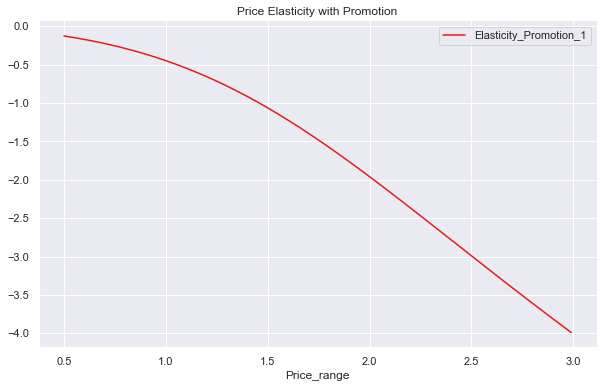

In [17]:
df_promo_pe.plot(figsize=(10,6))
plt.title('Price Elasticity with Promotion');

## Price Elasticity without Promotion

In [18]:
df_price_elasticity_no_promotion = df_price_range.copy()
df_price_elasticity_no_promotion['Promotion'] = 0

In [19]:
y_no_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_no_promotion)

In [20]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- y_no_promotion[:,1])

In [21]:
df_promo_pe['Elasticity_Promotion_0'] = price_elasticity_no_promo

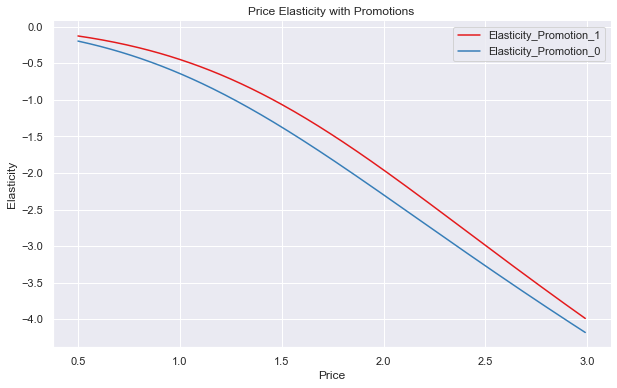

In [47]:
df_promo_pe.plot(figsize=(10,6))
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity with Promotions');

## Brand Choice Modeling

In [23]:
df_brand = df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [24]:
df_brand

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Education,Income,Occupation,Settlement size,Segment,Segment Names,Segment_0,Segment_1,Segment_2,Segment_3
ID,,,,,,,,,,,,,,,,,,,,,
200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,...,1,110866,1,0,2,fewer opportunities,0,0,1,0
200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,...,1,110866,1,0,2,fewer opportunities,0,0,1,0
200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,...,1,110866,1,0,2,fewer opportunities,0,0,1,0
200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,...,1,110866,1,0,2,fewer opportunities,0,0,1,0
200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,...,1,110866,1,0,2,fewer opportunities,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200000500,296,1,2,6,0,0,1.48,1.89,2.01,2.18,...,1,120946,1,0,2,fewer opportunities,0,0,1,0
200000500,460,1,1,12,0,0,1.35,1.57,2.02,2.21,...,1,120946,1,0,2,fewer opportunities,0,0,1,0
200000500,641,1,2,7,0,0,1.50,1.85,2.06,2.24,...,1,120946,1,0,2,fewer opportunities,0,0,1,0


In [25]:
y_brand = df_brand['Brand']

In [26]:
X_brand = df_brand[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']]

In [27]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')

In [28]:
model_brand_choice.fit(X_brand, y_brand)

LogisticRegression(multi_class='multinomial', solver='sag')

In [29]:
coef = pd.DataFrame(model_brand_choice.coef_)
coef

,0,1,2,3,4
0,-3.915950,0.658462,2.417740,0.704090,-0.202103
1,1.274615,-1.879855,-0.212638,-0.206339,0.587873
2,1.624172,0.562105,0.500841,1.039495,0.452774
3,0.574540,0.395589,-1.400600,-1.246241,0.249354
4,0.442623,0.263699,-1.305344,-0.291005,-1.087897


In [30]:
coefficient = coef.T
coefficient = coefficient.rename(columns={0:'Coef_Brand_1',1:'Coef_Brand_2',2:'Coef_Brand_3',
                                         3:'Coef_Brand_4',4:'Coef_Brand_5'})

In [31]:
coefficient.index = ['Price_1','Price_2','Price_3', 'Price_4', 'Price_5']
coefficient

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.915950,1.274615,1.624172,0.574540,0.442623
Price_2,0.658462,-1.879855,0.562105,0.395589,0.263699
Price_3,2.417740,-0.212638,0.500841,-1.400600,-1.305344
Price_4,0.704090,-0.206339,1.039495,-1.246241,-0.291005
Price_5,-0.202103,0.587873,0.452774,0.249354,-1.087897


## Own Price Elasticity Brand 5

In [32]:
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = df_brand['Price_1'].mean()
df_own_brand_5['Price_2'] = df_brand['Price_2'].mean()
df_own_brand_5['Price_3'] = df_brand['Price_3'].mean()
df_own_brand_5['Price_4'] = df_brand['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
245,1.384559,1.764717,2.006694,2.159658,2.95
246,1.384559,1.764717,2.006694,2.159658,2.96
247,1.384559,1.764717,2.006694,2.159658,2.97
248,1.384559,1.764717,2.006694,2.159658,2.98


In [33]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [34]:
pr_own_brand_5 = predict_brand_5[: ][:, 4]
beta5 = coef.iloc[4, 4]
beta5

-1.0878972367771491

In [35]:
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [36]:
df_brand_pe = pd.DataFrame()
df_brand_pe['Brand_5'] = own_price_elasticity_brand_5
df_brand_pe.index=price_range

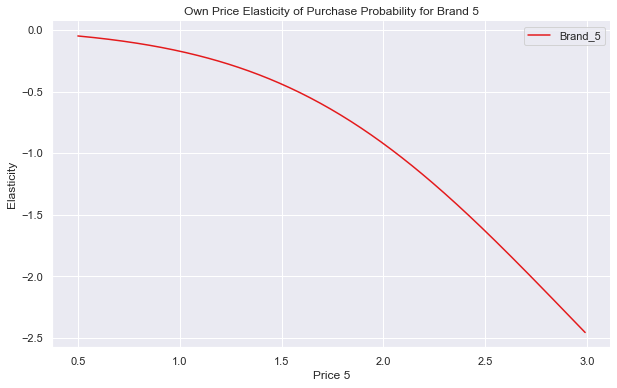

In [37]:
df_brand_pe.plot(figsize=(10,6))
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5');

## Cross Price Elasticity Brand 5, Cross Brand 4

In [38]:
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = df_brand['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = df_brand['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = df_brand['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = df_brand['Price_5'].mean()

In [39]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [40]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [41]:
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [42]:
beta5

-1.0878972367771491

In [43]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [44]:
df_brand_pe['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_brand_pe

,Brand_5,Brand_5_Cross_Brand_4
0.50,-0.048961,0.331371
0.51,-0.050519,0.336637
0.52,-0.052106,0.341846
0.53,-0.053723,0.346998
0.54,-0.055370,0.352093
...,...,...
2.95,-2.386185,0.273555
2.96,-2.403305,0.271044
2.97,-2.420425,0.268543
2.98,-2.437543,0.266050


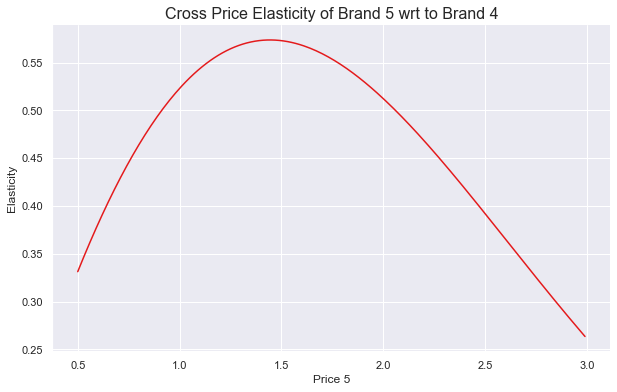

In [45]:
df_brand_pe['Brand_5_Cross_Brand_4'].plot(figsize=(10,6))
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt to Brand 4',fontsize=16);